# House Prices - Advanced Regression Techniques
Hi there! A new competition to do: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

As I need to practice with starting from scratch, that's what I'll do:
- Import all data
- Will do some graphs with Matplotlib and Seaborn
- Select features with highest correlation and do regression on them
- Google some feature engineering 
- Can do ridge / lasso regression on all parameters

In [4]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("train.csv")

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [12]:
print(train_data.columns)
print(len(train_data.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
print(train_data.corr()["SalePrice"].sort_values())

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

Most correlated are:
- Positively:
    - Overall Quality of Material And Finish
    - GrLivArea - Above grade (ground) living area square feet
    - Garage Cars
    - Garage Area (these two are highly correlated so choose one that better explains)
    - Total square feet of basement (moreover, I'd expect this to complement GrLivArea well)
- Negatively:
    - KitchenAbvGr - the strongest negative but much weaker 
    
 Will now plot sale price against Overall quality and against grlivarea


In [23]:
train_data.groupby('OverallQual')['SalePrice'].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

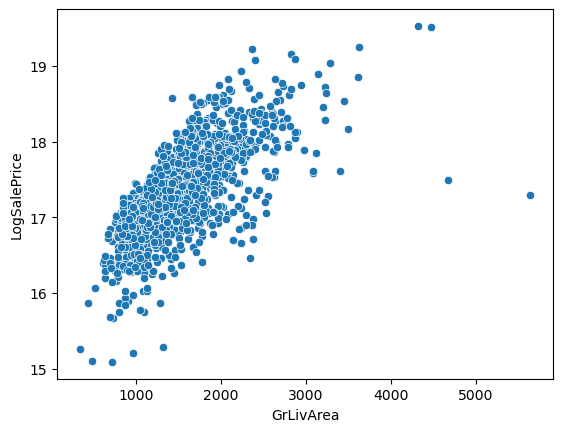

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

fig, ax = plt.subplots()

print()

train_data["LogSalePrice"] = np.log2(train_data["SalePrice"])

# p = sns.barplot("OverallQual", "SalePrice", data = train_data, ci=False)
b = sns.scatterplot(data=train_data, x="GrLivArea", y="LogSalePrice")

# ax.plot(train_data.sort_values("OverallQual")["OverallQual"], 
#         train_data.sort_values("OverallQual")["SalePrice"])

All right, let's first simply create a regression with the following features:
- Overall Quality of Material And Finish
- GrLivArea - Above grade (ground) living area square feet
- Garage Cars
- Garage Area (these two are highly correlated so choose one that better explains)
- Total square feet of basement (moreover, I'd expect this to complement GrLivArea well)
- FullBath
- YearBuilt
- Fireplaces


I'm curious what's the correlation of OverallQual and GrLivArea with the rest, let's see

In [39]:
print(train_data.corr()["OverallQual"].sort_values(ascending=False))
print(train_data.corr()["GrLivArea"].sort_values(ascending=False))

OverallQual      1.000000
LogSalePrice     0.817184
SalePrice        0.790982
GarageCars       0.600671
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
YearRemodAdd     0.550684
FullBath         0.550600
GarageYrBlt      0.547766
TotalBsmtSF      0.537808
1stFlrSF         0.476224
TotRmsAbvGrd     0.427452
MasVnrArea       0.411876
Fireplaces       0.396765
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
2ndFlrSF         0.295493
HalfBath         0.273458
LotFrontage      0.251646
BsmtFinSF1       0.239666
WoodDeckSF       0.238923
BsmtFullBath     0.111098
LotArea          0.105806
BedroomAbvGr     0.101676
MoSold           0.070815
PoolArea         0.065166
ScreenPorch      0.064886
MSSubClass       0.032628
3SsnPorch        0.030371
YrSold          -0.027347
Id              -0.028365
LowQualFinSF    -0.030429
MiscVal         -0.031406
BsmtHalfBath    -0.040150
BsmtFinSF2      -0.059119
OverallCond     -0.091932
EnclosedPorch   -0.113937
KitchenAbvGr

In [46]:
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "Fireplaces"]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = train_data[features]
y = train_data["LogSalePrice"]

reg = LinearRegression().fit(X, y)

reg.score(X, y)

mse = mean_squared_error(y, reg.predict(X))
print("MSE:", mse)
r2 = r2_score(y, reg.predict(X))
print("R-sqaured:", r2)

MSE: 0.05955792992806534
R-sqaured: 0.8205435108773813


Let's submit and see the results

In [68]:
test_data = pd.read_csv("test.csv")

# y_predict = reg.predict(test_data[features])
#There's some missing data!
print(test_data[features].describe())
print(test_data[features].loc[test_data["GarageCars"].isna()])

X = test_data[features].copy()

X["GarageCars"].fillna(value=X["GarageCars"].mean(), inplace=True)
X["TotalBsmtSF"].fillna(value=X["TotalBsmtSF"].mean(), inplace=True)
X[features].describe()
X[features].loc[test_data["GarageCars"].isna()]

y_predict = reg.predict(X)

SalePricePredict = np.exp2(y_predict)

submission = pd.DataFrame({
    "Id": test_data["Id"], 
    "SalePrice": SalePricePredict
})
submission.head()
submission.to_csv("submission.csv", index=False)

       OverallQual    GrLivArea   GarageCars  TotalBsmtSF     FullBath  \
count  1459.000000  1459.000000  1458.000000  1458.000000  1459.000000   
mean      6.078821  1486.045922     1.766118  1046.117970     1.570939   
std       1.436812   485.566099     0.775945   442.898624     0.555190   
min       1.000000   407.000000     0.000000     0.000000     0.000000   
25%       5.000000  1117.500000     1.000000   784.000000     1.000000   
50%       6.000000  1432.000000     2.000000   988.000000     2.000000   
75%       7.000000  1721.000000     2.000000  1305.000000     2.000000   
max      10.000000  5095.000000     5.000000  5095.000000     4.000000   

         YearBuilt  Fireplaces  
count  1459.000000  1459.00000  
mean   1971.357779     0.58122  
std      30.390071     0.64742  
min    1879.000000     0.00000  
25%    1953.000000     0.00000  
50%    1973.000000     0.00000  
75%    2001.000000     1.00000  
max    2010.000000     4.00000  
      OverallQual  GrLivArea  Garage